# Uptake of carbon

Plotting a global map of carbon uptake

In [43]:
%matplotlib inline

import xarray as xr
import intake

# util.py is in the local directory
# it contains code that is common across project notebooks
# or routines that are too extensive and might otherwise clutter
# the notebook design
import util 

In [15]:
import pprint 
uni_dict = col.unique(['source_id', 'experiment_id', 'table_id'])
pprint.pprint(uni_dict, compact=True)

{'experiment_id': {'count': 29,
                   'values': ['ssp370', 'esm-ssp585', '1pctCO2-bgc', 'hist-bgc',
                              '1pctCO2', 'abrupt-4xCO2', 'historical',
                              'piControl', 'amip', 'esm-hist', 'esm-piControl',
                              'hist-GHG', 'hist-aer', 'hist-nat', 'dcppA-assim',
                              'dcppA-hindcast', 'dcppC-hindcast-noAgung',
                              'dcppC-hindcast-noElChichon',
                              'dcppC-hindcast-noPinatubo', 'highresSST-present',
                              'control-1950', 'hist-1950', 'deforest-globe',
                              'esm-ssp585-ssp126Lu', 'omip1', 'lgm', 'ssp126',
                              'ssp245', 'ssp585']},
 'source_id': {'count': 48,
               'values': ['BCC-ESM1', 'BCC-CSM2-MR', 'CanESM5', 'CNRM-ESM2-1',
                          'UKESM1-0-LL', 'GISS-E2-1-G', 'CESM2', 'GFDL-ESM4',
                          'AWI-CM-1-1-MR', 'CAM

In [16]:
if util.is_ncar_host():
    col = intake.open_esm_datastore("../catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json")

In [17]:
cat = col.search(experiment_id=['historical'], table_id='Oyr', variable_id='dissic', grid_label='gn')

In [18]:
models = set(uni_dict['source_id']['values']) # all the models

for experiment_id in ['historical']:
    query = dict(experiment_id=experiment_id, table_id='Oyr', 
                 variable_id='dissic', grid_label='gn')  
    cat = col.search(**query)
    models = models.intersection({model for model in cat.df.source_id.unique().tolist()})

# for oxygen, ensure the CESM2 models are not included (oxygen was erroneously submitted to the archive)
# models = models - {'CESM2-WACCM', 'CESM2'}

models = list(models)
models

['CanESM5', 'IPSL-CM6A-LR', 'CESM2-WACCM', 'CESM2']

In [19]:
cat = col.search(experiment_id=['historical', 'ssp585'], table_id='Oyr', 
                 variable_id='dissic', grid_label='gn', source_id=models)
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
1475,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1544,CMIP,CCCma,CanESM5,historical,r10i1p2f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1614,CMIP,CCCma,CanESM5,historical,r11i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r11i1...,NaN
1710,CMIP,CCCma,CanESM5,historical,r12i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r12i1...,NaN
1806,CMIP,CCCma,CanESM5,historical,r13i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r13i1...,NaN
1903,CMIP,CCCma,CanESM5,historical,r14i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r14i1...,NaN
1999,CMIP,CCCma,CanESM5,historical,r15i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r15i1...,NaN
2095,CMIP,CCCma,CanESM5,historical,r16i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r16i1...,NaN
2191,CMIP,CCCma,CanESM5,historical,r17i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r17i1...,NaN
2288,CMIP,CCCma,CanESM5,historical,r18i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r18i1...,NaN


### Loading data

`intake-esm` enables loading data directly into an [xarray.Dataset](http://xarray.pydata.org/en/stable/api.html#dataset).

Note that data on the cloud are in 
[zarr](https://zarr.readthedocs.io/en/stable/) format and data on 
[glade](https://www2.cisl.ucar.edu/resources/storage-and-file-systems/glade-file-spaces) are stored as 
[netCDF](https://www.unidata.ucar.edu/software/netcdf/) files. This is opaque to the user.

`intake-esm` has rules for aggegating datasets; these rules are defined in the collection-specification file.

In [20]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False}, 
                                cdf_kwargs={'chunks': {'time' : 20}, 'decode_times': False})

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 8 group(s)


`dset_dict` is a dictionary of `xarray.Dataset`'s; its keys are constructed to refer to compatible groups.

In [21]:
dset_dict.keys()

dict_keys(['CMIP.CCCma.CanESM5.historical.Oyr.gn', 'CMIP.IPSL.IPSL-CM6A-LR.historical.Oyr.gn', 'CMIP.NCAR.CESM2.historical.Oyr.gn', 'CMIP.NCAR.CESM2-WACCM.historical.Oyr.gn', 'ScenarioMIP.CCCma.CanESM5.ssp585.Oyr.gn', 'ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.Oyr.gn', 'ScenarioMIP.NCAR.CESM2.ssp585.Oyr.gn', 'ScenarioMIP.NCAR.CESM2-WACCM.ssp585.Oyr.gn'])

We can access a particular dataset as follows.

In [22]:
dsC = dset_dict['CMIP.CCCma.CanESM5.historical.Oyr.gn']

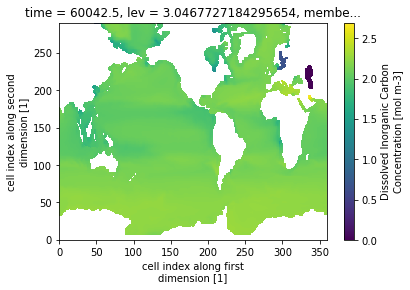

In [23]:
dsC.dissic.isel(member_id = 0,time=164,lev=0).plot()

In [24]:
cat_fx = col.search(experiment_id=['historical', 'ssp585'], source_id=models, table_id='Ofx', grid_label='gn')
cat_fx.df
cat_fx.df.drop_duplicates(subset=['source_id', 'variable_id'], inplace=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
cat_fx.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
1435,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Ofx,areacello,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1436,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Ofx,deptho,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1437,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Ofx,sftof,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1438,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Ofx,thkcello,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
6516,CMIP,IPSL,IPSL-CM6A-LR,historical,r10i1p1f1,Ofx,areacello,gn,gs://cmip6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,NaN
6517,CMIP,IPSL,IPSL-CM6A-LR,historical,r10i1p1f1,Ofx,basin,gn,gs://cmip6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,NaN
13358,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Ofx,sftof,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM/historical/r1...,NaN
14191,CMIP,NCAR,CESM2,historical,r10i1p1f1,Ofx,areacello,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r10i1p1f...,NaN
14193,CMIP,NCAR,CESM2,historical,r10i1p1f1,Ofx,deptho,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r10i1p1f...,NaN
14195,CMIP,NCAR,CESM2,historical,r10i1p1f1,Ofx,sftof,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r10i1p1f...,NaN


In [26]:
dset_dict = cat_fx.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False}, 
                                cdf_kwargs={'chunks': {}, 'decode_times': False})

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 5 group(s)


In [27]:
ds_fx = dset_dict['CMIP.CCCma.CanESM5.historical.Ofx.gn']

In [32]:
import numpy as np
import matplotlib.pyplot as plt

DICstore0 = (dsC.dissic.isel(time=(164-np.arange(10))).mean('time')*ds_fx.thkcello.isel(member_id=0)-dsC.dissic.isel(time=np.arange(10)).mean('time')*ds_fx.thkcello.isel(member_id=0)).sum('lev')

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


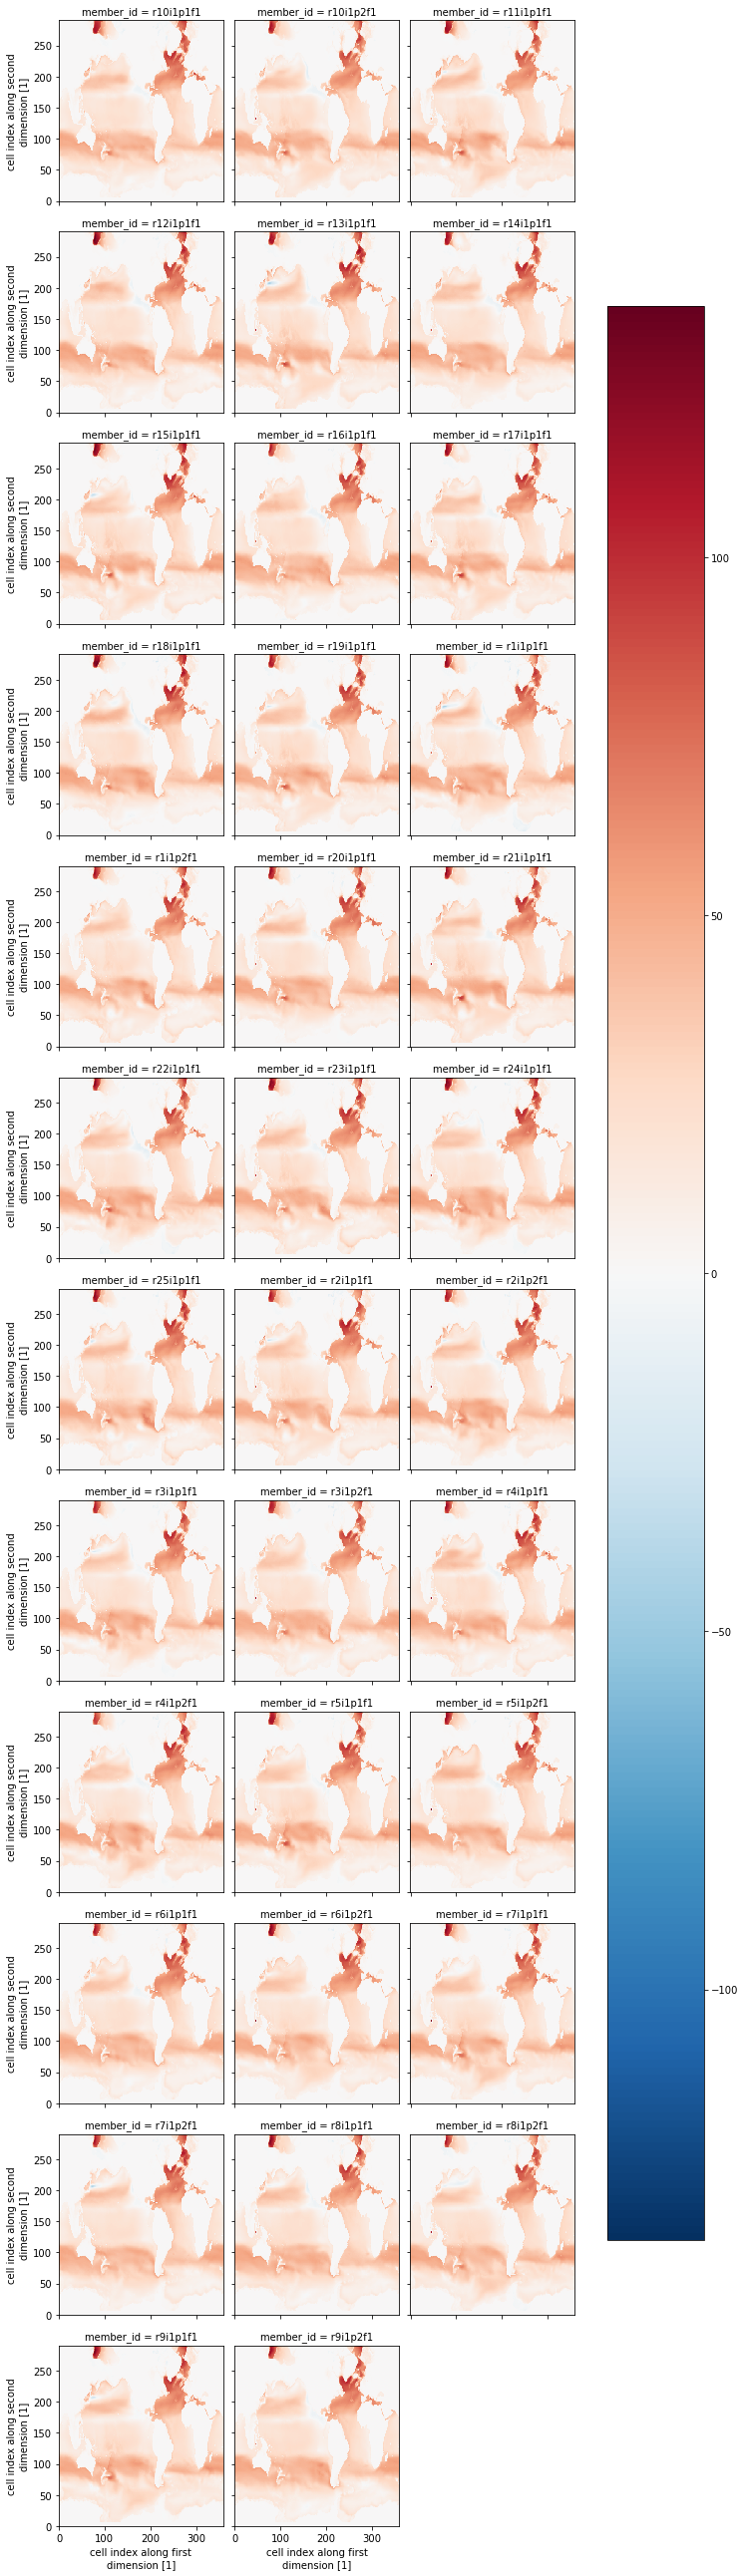

In [34]:
DICstore0.plot(col='member_id', col_wrap=3)

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


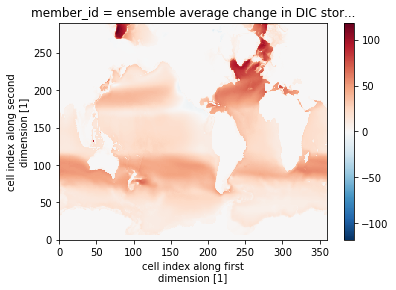

In [29]:
DICstore['member_id'] = 'ensemble average change in DIC storage (mol/m^2) 1850 to 2015'
DICstore.plot()

In [30]:
DICsurf = (dsC.dissic.isel(lev = 0,time=(164-np.arange(10))).mean('time')-dsC.dissic.isel(lev = 0,time=np.arange(10)).mean('time')).mean('member_id')

In [35]:
DICsurf0 = dsC.dissic.isel(lev = 0,time=(164-np.arange(10))).mean('time')-dsC.dissic.isel(lev = 0,time=np.arange(10)).mean('time')

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


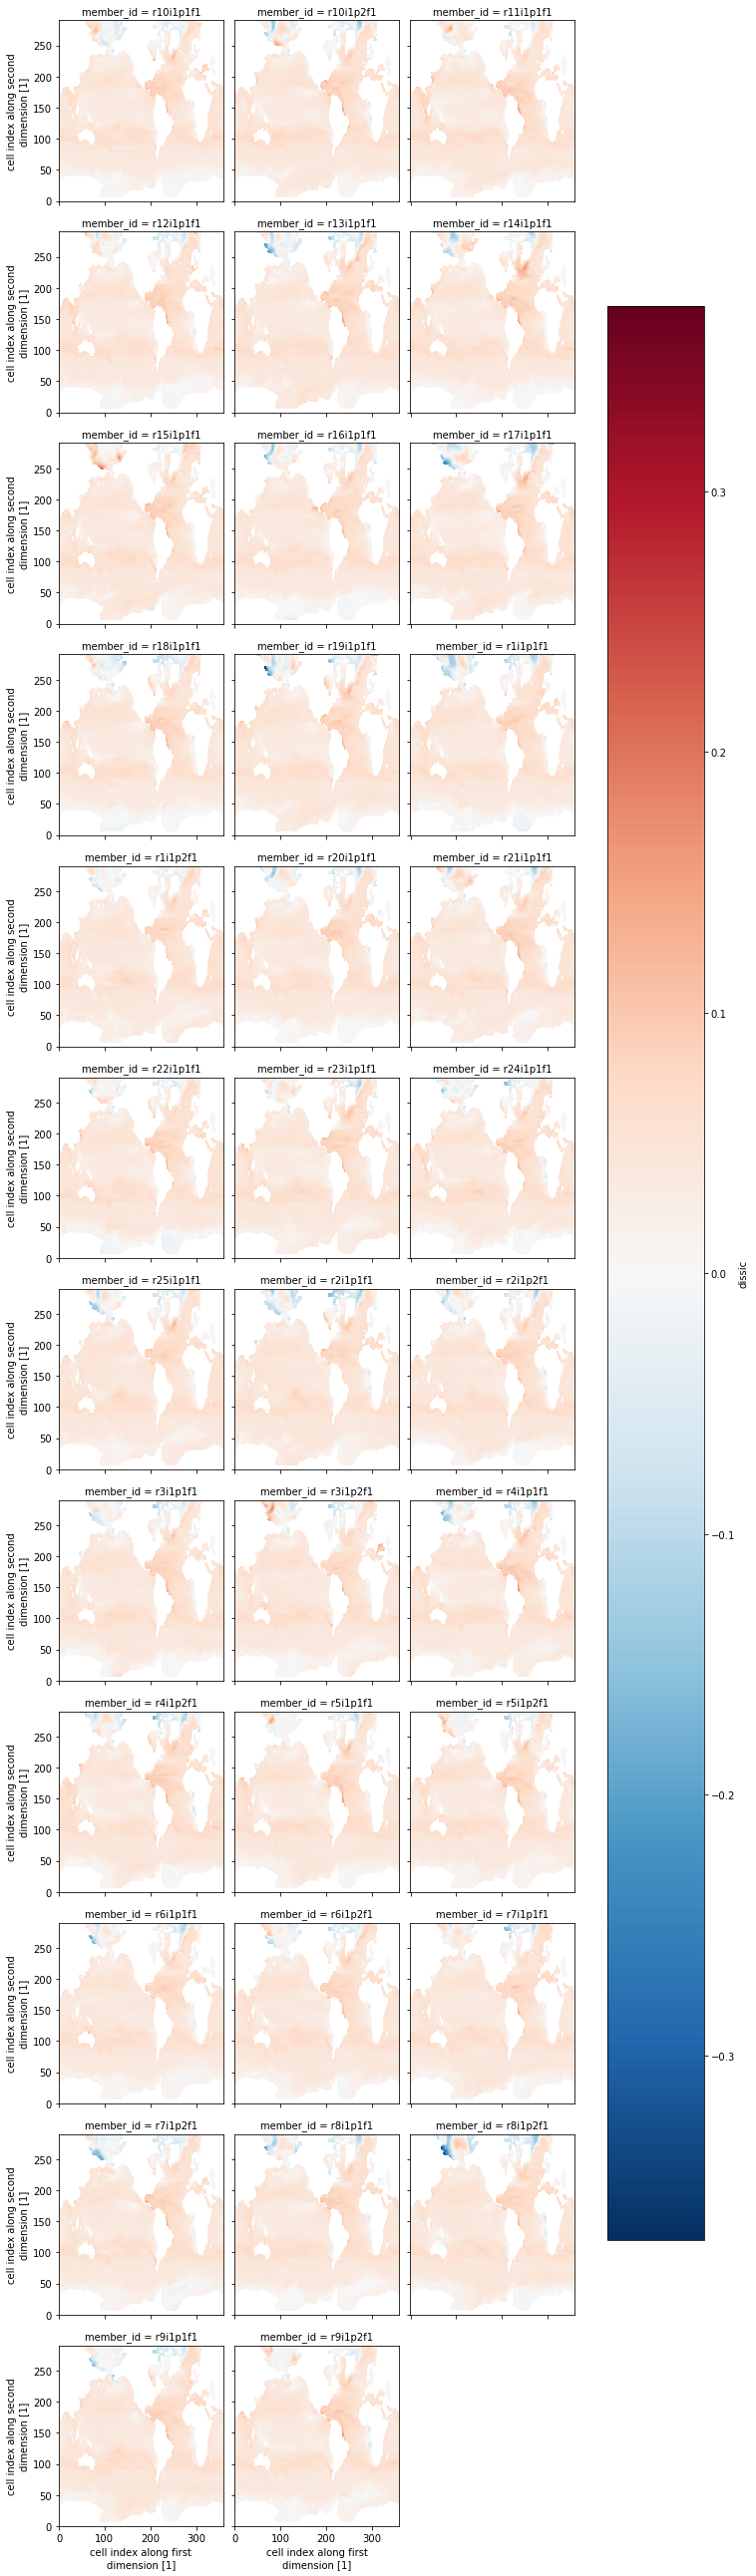

In [36]:
DICsurf0.plot(col='member_id', col_wrap=3)

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


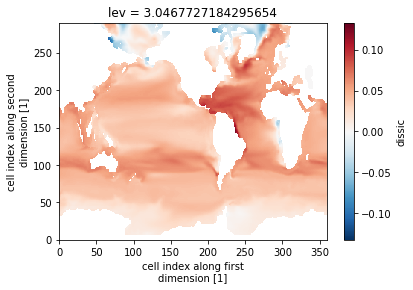

In [31]:
DICsurf.plot()

In [63]:
from dask.distributed import Client

client = Client("tcp://10.32.12.58:33425")
client

Client Scheduler: tcp://10.32.12.58:33425 Dashboard: /user/0000-0003-0487-8518/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [70]:
ds = dsC['dissic'].chunk({'time': -1, 'member_id': 1, 'i': 55, 'j': 110})
ds.data

,Array,Chunk
Bytes,108.90 GB,179.69 MB
Shape,"(35, 165, 45, 291, 360)","(1, 165, 45, 110, 55)"
Count,9415 Tasks,735 Chunks
Type,float32,numpy.ndarray


In [71]:
def _compute_slope(y):
    """
    Private function to compute slopes at each grid cell using
    polyfit. 
    """
    x = np.arange(len(y))
    return np.polyfit(x, y, 1)[0] # return only the slope

def compute_slope(da):
    """
    Computes linear slope (m) at each grid cell.
    
    Args:
      da: xarray DataArray to compute slopes for
      
    Returns:
      xarray DataArray with slopes computed at each grid cell.
    """
    # apply_ufunc can apply a raw numpy function to a grid.
    # 
    # vectorize is only needed for functions that aren't already
    # vectorized. You don't need it for polyfit in theory, but it's
    # good to use when using things like np.cov.
    #
    # dask='parallelized' parallelizes this across dask chunks. It requires
    # an output_dtypes of the numpy array datatype coming out.
    #
    # input_core_dims should pass the dimension that is being *reduced* by this operation,
    # if one is being reduced.
    slopes = xr.apply_ufunc(_compute_slope,
                            da,
                            vectorize=True,
                            dask='parallelized', 
                            input_core_dims=[['time']],
                            output_dtypes=[float],
                            )
    return slopes

In [76]:
slope = compute_slope(ds.isel(member_id=0))

In [79]:
slope = slope.compute()

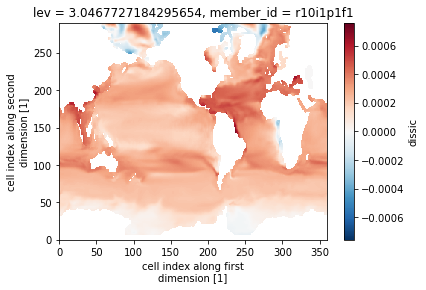

In [82]:
slope[0].plot()

In [78]:
from dask.distributed import Client

client = Client("tcp://10.32.12.58:37603")
client

Client Scheduler: tcp://10.32.12.58:37603 Dashboard: /user/0000-0003-0487-8518/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [74]:
from dask.distributed import Client

client = Client("tcp://10.32.12.58:45129")
client

Client Scheduler: tcp://10.32.12.58:45129 Dashboard: /user/0000-0003-0487-8518/proxy/8787/status,Cluster Workers: 30 Cores: 60 Memory: 345.00 GB
